
# Board Game Data Visualization

        In order to provide insights related to board games, the data collected by geekdo made available by boardgamegeek.com will be analysed and, using different python libraries, made visually represented highlighting important statistical metrics, with the primary goal of elucidating the subject to amateurs and professionals.

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.image as image
import matplotlib.colors as mc
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
warnings.filterwarnings("ignore")
bg = pd.read_csv("board_games.csv")
pd.set_option('display.max_columns', 50)
bg.head()

game_id                                        description  \
0        1  Die Macher is a game about seven sequential po...   
1        2  Dragonmaster is a trick-taking card game based...   
2        3  Part of the Knizia tile-laying trilogy, Samura...   
3        4  When you see the triangular box and the luxuri...   
4        5  In Acquire, each player strategically invests ...   

                                          image  max_players  max_playtime  \
0   //cf.geekdo-images.com/images/pic159509.jpg            5           240   
1   //cf.geekdo-images.com/images/pic184174.jpg            4            30   
2  //cf.geekdo-images.com/images/pic3211873.jpg            4            60   
3   //cf.geekdo-images.com/images/pic285299.jpg            4            60   
4   //cf.geekdo-images.com/images/pic342163.jpg            6            90   

   min_age  min_players  min_playtime            name  playing_time  \
0       14            3           240      Die Macher           240   
1       12            3            30    Dragonmaster            30   
2       10            2            30         Samurai            60   
3       12            2            60  Tal der Könige            60   
4       12            3            90         Acquire            90   

                                        thumbnail  year_published  \
0   //cf.geekdo-images.com/images/pic159509_t.jpg            1986   
1   //cf.geekdo-images.com/images/pic184174_t.jpg            1981   
2  //cf.geekdo-images.com/images/pic3211873_t.jpg            1998   
3   //cf.geekdo-images.com/images/pic285299_t.jpg            1992   
4   //cf.geekdo-images.com/images/pic342163_t.jpg            1964   

                        artist                        category compilation  \
0          Marcus Gschwendtner  Economic,Negotiation,Political         NaN   
1                   Bob Pepper               Card Game,Fantasy         NaN   
2              Franz Vohwinkel      Abstract Strategy,Medieval         NaN   
3                          NaN                         Ancient         NaN   
4  Scott Okumura,Peter Whitley                        Economic         NaN   

                designer expansion  \
0     Karl-Heinz Schmiel       NaN   
1  G. W. "Jerry" D'Arcey       NaN   
2          Reiner Knizia       NaN   
3      Christian Beierer       NaN   
4            Sid Sackson       NaN   

                                              family  \
0         Country: Germany,Valley Games Classic Line   
1                                   Animals: Dragons   
2  Asian Theme,Country: Japan,Knizia tile-laying ...   
3             Country: Egypt,Promotional Board Games   
4                                3M Bookshelf Series   

                                            mechanic  \
0  Area Control / Area Influence,Auction/Bidding,...   
1                                       Trick-taking   
2  Area Control / Area Influence,Hand Management,...   
3  Action Point Allowance System,Area Control / A...   
4       Hand Management,Stock Holding,Tile Placement   

                                           publisher  average_rating  \
0  Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...         7.66508   
1                           E.S. Lowe,Milton Bradley         6.60815   
2  999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...         7.44119   
3                                             KOSMOS         6.60675   
4  3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...         7.35830   

   users_rated  
0         4498  
1          478  
2        12019  
3          314  
4        15195

## The top 5 best rated board games

        As observed above there are several features in the dataset which can be employed to extract useful information related to board games. One of those that can be visually represented using a simple bar plot is what are the top five best-rated board games. Python library matplotlib can be used to achieve that in an alluring aesthetic, made well know by The Economist magazine (Ritz, 2022). A bar plot is ideal to show the relationship between numeric and categorical variables, it has a simple design, however, fulfils the goal of displaying a simple top-five average effectively, making easy to notice subtle differences by comparing the length of the bars, each bar relates to each explored categorical variable (Holtz, 2018).

Text(-0.35, 0.08, 'Source: "Geekdo" via boardgamegeek.com')

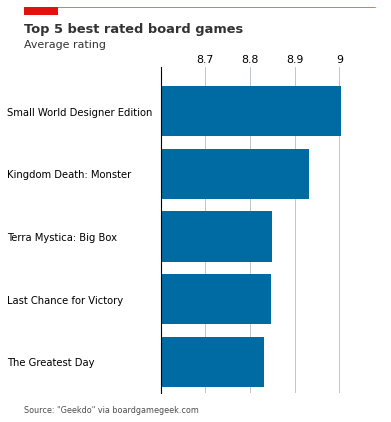

In [6]:
# Setup plot size.
fig, ax = plt.subplots(figsize=(4,6))

# Create grid 
# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)

# Setup data
bg_bar = bg.sort_values(by='average_rating')[-5:]
bg_bar['name'] = bg_bar['name'].replace('The Greatest Day: Sword, Juno, and Gold Beaches', 'The Greatest Day')

# Remove splines. Can be done one at a time or can slice with a list.
ax.spines[['top','right','bottom']].set_visible(False)

# Make left spine slightly thicker
ax.spines['left'].set_linewidth(1.1)
ax.spines['left'].set_linewidth(1.1)

# Plot data
ax.barh(bg_bar['name'], bg_bar['average_rating'], color='#006BA2', zorder=2)

# Set custom labels for x-axis
ax.set_xticks([8.7,8.8,8.9,9])
ax.set_xticklabels([8.7,8.8,8.9,9])

# Reformat x-axis tick labels
ax.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         labelbottom=False,  # Set no x-axis labels on bottom
                         bottom=False,       # Set no ticks on bottom
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

# Reformat y-axis tick labels
ax.set_yticklabels(bg_bar['name'],      # Set labels again
                   ha = 'left')              # Set horizontal alignment to left
ax.yaxis.set_tick_params(pad=150,            # Pad tick labels so they don't go over y-axis
                         labelsize=10,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

# Shrink y-lim to make plot a bit tighter
ax.set_ylim(-0.5, 4.7)

# Shrink x-lim to make the subtle difference more noticeable
ax.set_xlim(8.6, 9.1)

# Add in line and tag
ax.plot([-.35, .87],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((-.35,1.02),                # Set location of rectangle by lower left corder
                           0.12,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax.text(x=-.35, y=.96, s="Top 5 best rated board games", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=-.35, y=.925, s="Average rating", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=-.35, y=.08, s= """Source: "Geekdo" via boardgamegeek.com""", transform=fig.transFigure, ha='left', fontsize=8, alpha=.7)


        The best-rated board game is "Small World Designer Edition", but the difference is that huge as the length of the horizontal bars may apprise, that is because the axis was designedly that way to exhibit subtle differences in a more noticeable way. The good practice to avoid biasing the audience is to start the length of the bar on 0, however, in that case, that would end the purpose of the bar plot (Agrawal, 2022).

## Correlation between the number of users that rated the game and the maximum recommended playtime

        Scatter plot is a superb way to display the relationship between two numeric variables, with the value that correspond to each variable being represented by dot in the X and Y axis. This technique is commonly used to check for correlation of the two numeric variable, that can be negative or positive (Holtz, 2018). The corrcoef function report this correlation.

In [7]:
#Check the correlation coefficient
np.corrcoef(bg.users_rated, bg.max_playtime)

array([[ 1.        , -0.00434165],
       [-0.00434165,  1.        ]])

        As show be the slightly bellow 0 negative number the correlation between those two numeric variable is slightly negative, which should not be distinguishable in a scatter plot. 

Text(0.12, 0.08, 'Source: "Geekdo" via boardgamegeek.com')

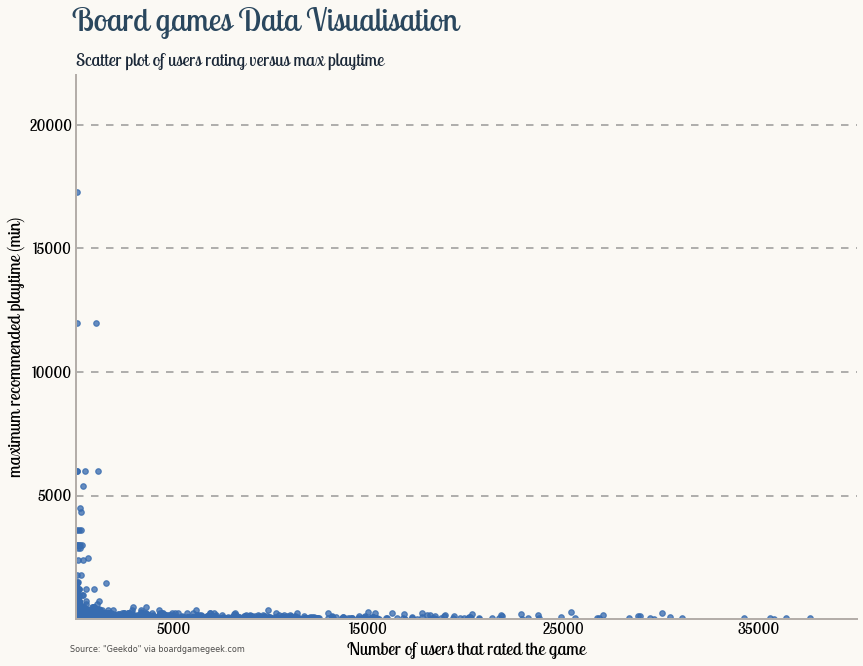

In [8]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
a= "#386cb0"
# Horizontal lines
HLINES = [5000, 10000, 15000,20000]

# Vertical and horizontal tick marks
YTICKS = [5000, 10000, 15000,20000]
XTICKS = [5000,15000,25000,35000]

# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize= (14, 10))

# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines in the background
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add scatterplot  -----------------------------------------------
    ax.scatter("users_rated", "max_playtime", s=30, color=a, 
        marker="o", alpha=0.3, data=bg
    )

# Add title and subtitle -----------------------------------------
# Title
fig.suptitle(
    "Board games Data Visualisation",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=32,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
)

# Subtitle
ax.set_title(
    "Scatter plot of users rating versus max playtime",
    loc="left",
    ha="left",
    fontsize=18,
    fontname="Lobster Two",
    color=BLUE_DARK,
    weight="bold",
    pad=10
)


# Shrink y-lim to make plot a bit tighter
ax.set_ylim(0, 22000)

# Shrink x-lim to make plot a bit tighter
ax.set_xlim(0, 40000)

# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")


# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(YTICKS)
ax.set_yticklabels(YTICKS, fontname="Lobster Two", size=15)
ax.set_ylabel("maximum recommended playtime (min)", fontname="Lobster Two", size=18, weight="bold")

ax.set_xticks(XTICKS)
ax.set_xticklabels(XTICKS, fontname="Lobster Two", size=15)
ax.set_xlabel("Number of users that rated the game", fontname="Lobster Two", size=18, weight="bold")

# Set source text
ax.text(x=.12, y=.08, s= """Source: "Geekdo" via boardgamegeek.com""", transform=fig.transFigure, ha='left', fontsize=8, alpha=.7)


        As expected, the nature of the data provides a unpleasant looking scatter plot, with most of the dot overlapped in low values in the X and Y axis. Log transformation can be used in order to improve the graph and extract some information from it (Htoon, 2020).

Text(0.12, 0.08, 'Source: "Geekdo" via boardgamegeek.com')

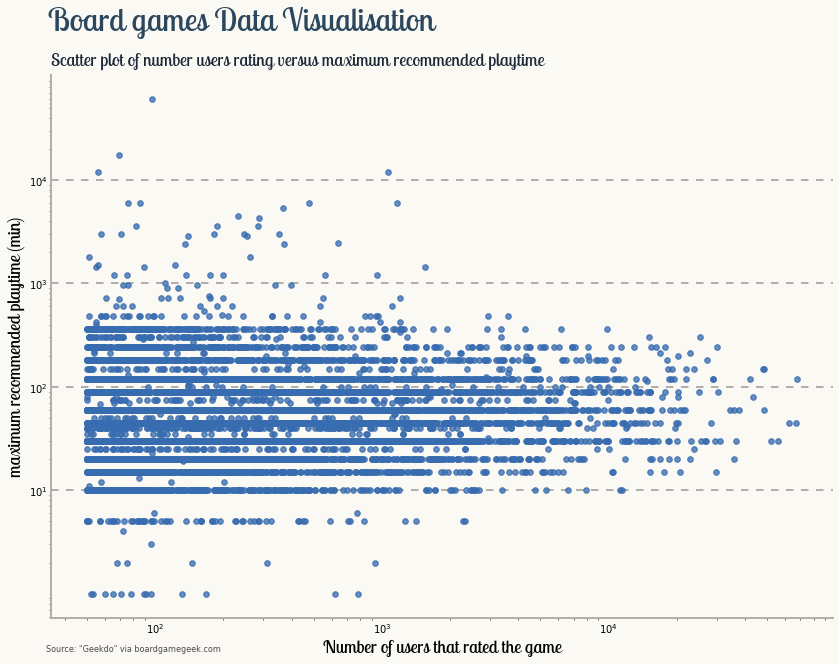

In [9]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
a= "#386cb0"

# Horizontal lines
HLINES_L = [10, 100, 1000,10000]

# Vertical and horizontal tick marks
YTICKS_L = [10, 100, 1000,10000]
XTICKS_L = [100, 1000, 10000]


# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize= (14, 10))

# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines in the background
for h in HLINES_L:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add scatterplot  -----------------------------------------------
    ax.scatter("users_rated", "max_playtime", s=30, color=a, 
        marker="o", alpha=0.3, data=bg
    )

# Add title and subtitle -----------------------------------------
# Title
fig.suptitle(
    "Board games Data Visualisation",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=32,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
)

# Subtitle
ax.set_title(
    "Scatter plot of number users rating versus maximum recommended playtime",
    loc="left",
    ha="left",
    fontsize=18,
    fontname="Lobster Two",
    color=BLUE_DARK,
    weight="bold",
    pad=10
)

#
ax.set_yscale('log')     
ax.set_xscale('log')


# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")


# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

#
xlb = ["10²","10³","10⁴"]
ylb = [ "10¹","10²","10³","10⁴"]

# Customize labels and ticks
ax.tick_params(length=0)
ax.set_yticks(YTICKS_L)
ax.set_ylabel("maximum recommended playtime (min)", fontname="Lobster Two", size=18, weight="bold")

ax.set_xticks(XTICKS_L)
ax.set_xlabel("Number of users that rated the game", fontname="Lobster Two", size=18, weight="bold")

# Set source text
ax.text(x=.12, y=.08, s= """Source: "Geekdo" via boardgamegeek.com""", transform=fig.transFigure, ha='left', fontsize=8, alpha=.7)


        Both axis log transformed improved the representation of the pattern associated with the values of each variable, however, as expected based on the result obtained by the "corrcoef" function, still no visible correlation between those variables.

## The distribution of game categories 

        As a categorical variable, game categories distribution can be displayed in a simple count plot using python seaborn library. The count plot displays the categorical variables as the length of the bar, but differently from the bar plot, the length of the bar represents the number of counts of each categorical variable (Holtz, 2018). Considering the extensive number of categories, the top 25 most common will be selected and exhibited in descending order.  

Text(0.5, 1.0, 'Distribution of board game categories')

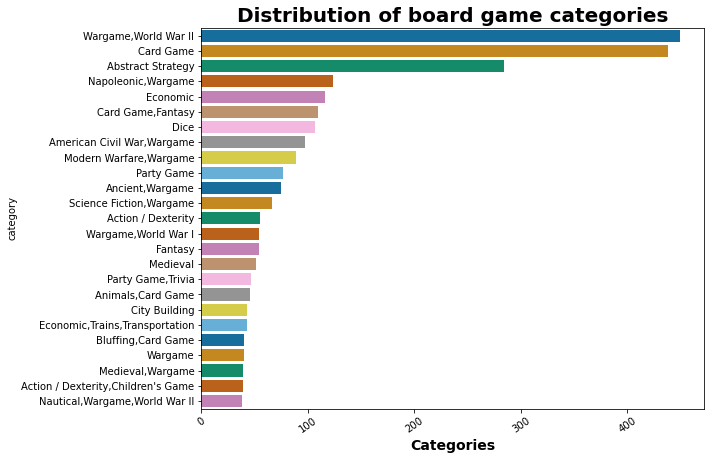

In [10]:
#Figure size
plt.figure(figsize=(9,7))
ax = sns.countplot(y = 'category', data = bg, palette = "colorblind", order = bg['category'].value_counts().iloc[:25].index)

# Customize label and ticks
plt.xticks(rotation=35)
ax.set_xlabel("Categories", size=14, weight="bold")

#Add title
plt.title('Distribution of board game categories', fontsize=20,weight="bold")

        The main goal of the colours chosen to represent each bar is to be dissociable by the highest number of viewers possible,  the colour-blind palette achieves superiority in that. Placing the categorical variable on the Y-axis turn the bars horizontally, allowing a higher quality visualisation with higher number of variables displayed. War games based on world war II followed by card games and abstract strategy are the most common categories with a vast upper hand.

## The 3 most common board games mechanics

        The seaborn library count plot being applied once more, the purpose is to display what are the 3 most common board game mechanics. Considering that the number of categories is not extensive as in the last plot, the categorical variable can be kept on the X-axis.    

Text(0.5, 1.0, 'Most common mechanics in board games')

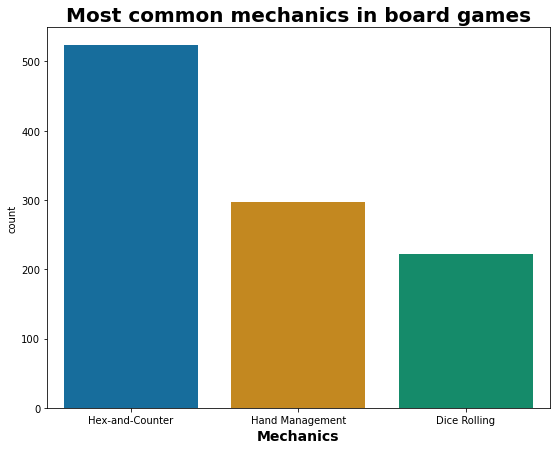

In [11]:
#Figure size
plt.figure(figsize=(9,7))
ax = sns.countplot(x = 'mechanic', data = bg, palette = "colorblind", order = bg['mechanic'].value_counts().iloc[:3].index)

# Customize label
ax.set_xlabel("Mechanics", size=14, weight="bold")

#Add title
plt.title('Most common mechanics in board games', fontsize=20,weight="bold")

## Comparison of the mean average of older games (1992 and earlier) to newer games after 1992).

           Histograms are particularly great to show numeric distribution, but when including many groups violin plots may be a more suitable option. Violin plot recall the boxplot, although it allows greater understanding of the distribution (Holtz, 2018). Using plotly library it is possible to build a interactive violin plot that not only shows the distribution of the numeric variables grouped in two different categories, but also reports descriptive statistics like the mean (plotly.com, n.d.).

In [12]:
#Group year group in a new variable
on = pd.cut(bg.year_published, bins= [0, 1992,9999], labels= ["Older games", "Newer games"])
bg.insert(12,"year group", on)
fig = go.Figure()

age_g = ["Older games", "Newer games"]

#Create the interactive violin plot
for age_group in age_g:
    fig.add_trace(go.Violin(x=bg["year group"][bg["year group"] == age_group],
                            y=bg['average_rating'][bg["year group"] == age_group],
                            name=age_group,
                            box_visible=True,
                            meanline_visible=True,
                           ))
#Add label and title and customize  
fig.update_layout(
    title="Distribution of user average rating",
    yaxis_title="User average rating",
    legend_title="Interval",
    font=dict(
        family="Courier New, monospace",
        size=18
    )
)
fig.update_layout(violingap=0.2, violinmode='overlay')
fig.update_traces(meanline_visible=True)
fig.show()

        The median and mean value are represented by the horizontal line inside the box, the doted one being the mean. May be hard to discriminate between them because since both distribution are normal, the mean an median value are approximately the same. The interactiveness of the plot come in hand here, by moving the cursor over the plot the viewer have access to it's proportional value altogether with quartile range and the slight difference value of the mean and median. The distribution shows a clear user preference for the newer games

## How does the average rating transition over the decades,  and how it relates to each game's average rating  and the total number of votes over the years

        The previous plot reported a user preference for newer games over the old ones, using matplotlib to build a lollipop plot overlaid to a line plot, the goal is to not only shows how the average rating transition through the decades, but also show how it relates to the number of games over the years and the total number of users that rated each game (Holtz, 2018). The vertical lines of the lollipop represent each game observation, it moves in a year all the way to its associated rating and turn in to a circle, the size of that circle correspond to the total number of users, the starting point of each lollipop line is the horizontal line that represents the average user rating for that decade.

In [13]:
# Create a label to separate years into decades
dec = pd.cut(bg.year_published, bins= [0, 1959,1969,1979,1989,1999,2009,2019], labels= [1,2,3,4,5,6,7])
bg.insert(13,"Decade", dec)

# Create the average variable (that will be used for the line plot later)
bg_avg = bg.assign(
    avg = bg.groupby("Decade")['average_rating'].transform("mean"),
    mid = bg.groupby("Decade")["year_published"].transform("mean")
)

In [14]:
# Build df_lines dataframe
df_lines = bg_avg.groupby("Decade").agg(
    start_x = ("year_published", min),
    end_x = ("year_published", max)
).reset_index()
df_lines["y"] = np.unique(bg_avg["avg"])

# This extends the horizontal lines a little on each direction.
df_lines["start_x"] -= 0.47
df_lines["end_x"] += 0.47

df_lines = pd.melt(
    df_lines, 
    id_vars=["Decade", "y"], 
    value_vars=["start_x", "end_x"], 
    var_name="type", 
    value_name="x"
)
df_lines["x_group"] = np.where(df_lines["type"] == "start_x", df_lines["x"] + 0.1, df_lines["x"] - 0.1)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "start_x").values & (df_lines["x"] == np.min(df_lines["x"])).values, 
    df_lines["x_group"] - 0.1, 
    df_lines["x_group"]
)
df_lines["x_group"] = np.where(
    (df_lines["type"] == "end_x").values & (df_lines["x"] == np.max(df_lines["x"])).values, 
    df_lines["x_group"] + 0.1, 
    df_lines["x_group"]
)
df_lines = df_lines.sort_values(["Decade", "x_group"])

In [15]:
# This function takes a color and adjusts its lightness
# Values below 1 make it darker, values above 1 make it lighter.
def adjust_lightness(color, amount=0.02):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])
# Misc colors
GREY82 = "#d1d1d1"
GREY70 = "#B3B3B3"
GREY40 = "#666666"
GREY30 = "#4d4d4d"
BG_WHITE = "#fafaf5"

# These colors (and their dark and light variant) are assigned to each of the 7 decades
COLORS = ["#486090", "#D7BFA6", "#6078A8", "#9CCCCC", "#7890A8","#C7B0C1", "#B5C9C9", "#90A8C0", "#A8A890"]
COLORS_DARK = [adjust_lightness(color, 0.8) for color in COLORS]
COLORS_LIGHT = [adjust_lightness(color, 1.2) for color in COLORS]

# Three colormaps with three variants
cmap_regular = mc.LinearSegmentedColormap.from_list("regular", COLORS)
cmap_dark = mc.LinearSegmentedColormap.from_list("dark", COLORS_DARK)
cmap_light = mc.LinearSegmentedColormap.from_list("light", COLORS_LIGHT)

# Function used to normalize decade values into 0-1 scale.
normalize = mc.Normalize(vmin=1, vmax=9)

# The bgg logo
IMAGE = image.imread("bgg.png")

# Horizontal lines
HLINES = [1.5, 3, 4.5, 6, 7.5, 9]

In [16]:
#Scale the number of votes to the size of the dot
VOTES_MAX = bg["users_rated"].max()
VOTES_MIN = bg["users_rated"].min()

# low and high refer to the final dot size.
def scale_to_interval(x, low=30, high=300):
    return ((x - VOTES_MIN) / (VOTES_MAX - VOTES_MIN)) * (high - low) + low

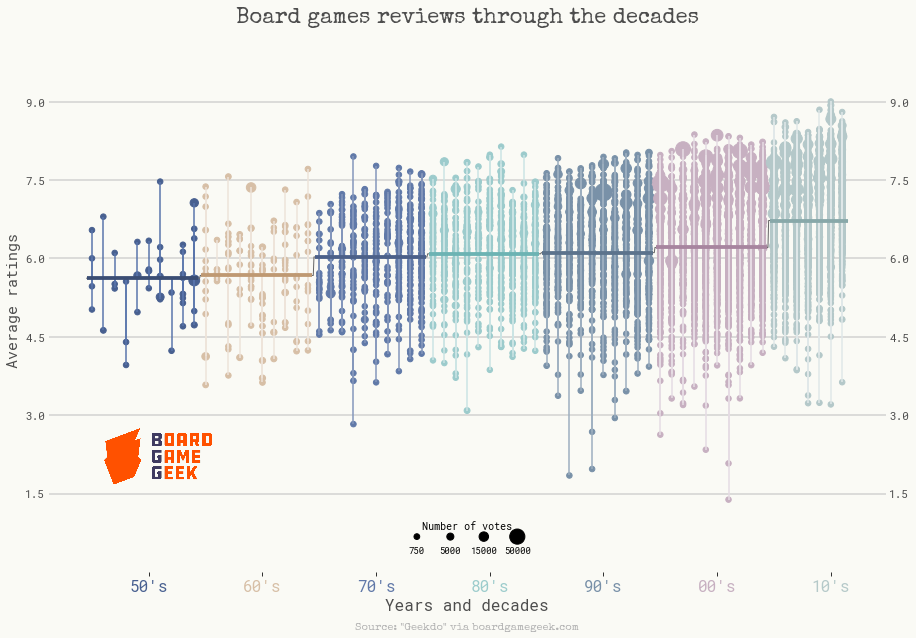

In [17]:
fig, ax = plt.subplots(figsize = (15, 10))


# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# First, horizontal lines that are used as scale reference
# zorder=0 to keep them in the background
for h in HLINES:
    plt.axhline(h, color=GREY82, zorder=0)

     
# Add vertical segments ------------------------------------------
# Vertical segments. 
# These represent the deviation of years rating from the mean rating of 
# the decade the year belong to.
plt.vlines(
    x= "year_published", 
    ymin= "average_rating", 
    ymax="avg",
    color=cmap_light(normalize(bg_avg["Decade"])),
    data = bg_avg,
)


# Add horizontal segments ----------------------------------------
# A grey line that connects mean values
# The third argument is the format string, either empty or "-"
plt.plot("x", "y", "-", color=GREY40,lw=1, data=df_lines)

# These represent the mean rating per decade. 
for Decade in df_lines["Decade"].unique():
    d = df_lines[df_lines["Decade"] == Decade]
    plt.plot("x_group", "y", "", color=cmap_dark(normalize(Decade)), lw=3.8, data=d, solid_capstyle="butt")

    
# Add dots ------------------------------------------------------- 
# The dots indicate each years rating, with its size given by the 
# number of votes.
plt.scatter(
    "year_published", 
    'average_rating',
    s = scale_to_interval(bg_avg["users_rated"]),
    color=cmap_regular(normalize(bg_avg["Decade"])), 
    data=bg_avg,
    zorder=1
)


# Customize layout -----------------------------------------------
    
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["left"].set_color("none")

# Customize y ticks
# * Remove y axis ticks 
# * Put labels on both right and left sides
plt.tick_params(axis="y", labelright=True, length=0)
plt.yticks(HLINES, fontname="Roboto Mono", fontsize=11, color=GREY30)
plt.ylim(0.98 * 0.0, 10.2 * 1.02)

# Y label
plt.ylabel("Average ratings", fontname="Roboto Mono", fontsize=15, color=GREY30, fontweight='bold')

# X ticks
plt.xticks([1955, 1965, 1975, 1985, 1995, 2005, 2015],labels= ["50's","60's","70's","80's","90's","00's","10's"] ,fontname= "Roboto Mono", fontsize = 16 , color=GREY30, weight = "bold")
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), COLORS):
    ticklabel.set_color(tickcolor)
plt.xlabel("Years and decades", fontname="Roboto Mono", fontsize=16, color=GREY30, fontweight='bold')

# Add caption
plt.text(
    0.5, -0.1, """Source: "Geekdo" via boardgamegeek.com""", 
    fontname="Special Elite", 
    fontsize=11, 
    color=GREY70,
    ha="center", 
    va="center", 
    transform=ax.transAxes # so coordinates are in terms of the axis.
)

# Create annotation box to place image.
# It will be added at (1, 2.5) in data coordinates.
ab = AnnotationBbox(
    OffsetImage(IMAGE, zoom=0.09), 
    (1953, 2.2), 
    xycoords="data", 
    box_alignment=(0.2, 0.5),
    pad=0.6, 
    frameon=False,
)

# Add the annotation box into the axis
ax.add_artist(ab)


# Add custom legend ----------------------------------------------

# We create a horizontal legend from scratch so this plot looks as 
# much as possible like the original.

# Horizontal position for the dots and their labels
x_pos = [0.44, 0.48, 0.52, 0.56]
votes = [750, 5000, 15000, 50000]

# Dots are in term of the (0, 1) coordinate system of the axis.
plt.scatter(
    x_pos, 
    [0.065] * 4, 
    s=scale_to_interval(np.array(votes)), 
    color="black",
    transform=ax.transAxes
)

# Add title to our custom legend
plt.text(0.5, 0.078, "Number of votes", fontname="Roboto Mono", fontsize=10, ha="center", transform=ax.transAxes)

# Place legends below the legend markers
for (xpos, vote) in zip(x_pos, votes):
    plt.text(xpos, 0.035,  f"{vote}", fontname="Roboto Mono", fontsize=9, ha="center", transform=ax.transAxes)

#Add a title
plt.title("Board games reviews through the decades", fontname="Special Elite", fontsize= 22, color=GREY30)
    
# Now save the plot!
plt.savefig(
    "bgg-lollipop.png", 
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.3
)

        The graph above is filled with information that can be explored by the viewer, to begin with, the rise of the horizontal line represents the preference for newer board games, the highest leaps being from the sixties to the seventies and from the nineties to the noughties. The massive number of dots and vertical lines in the later decades report a substantial increase in the number of games released over the year, the bigger size of the dots also implies more users voting for them. Regarding the dispersion of the average rating of individual games, a single game exceed the 9 in the Y-axis, which is also the number of games that has a average rating inferior to 3, most of them in the later decades.

# References

Agrawal, M. (2022). What Happens When Bar Charts Don’t Start With Zero? [online] Loud Updates. Available at: https://medium.com/loud-updates/what-happens-when-bar-charts-dont-start-with-zero-7db04221417e.

Holtz, Y. (2018). From data to Viz | Find the graphic you need. [online] Data-to-viz.com. Available at: https://www.data-to-viz.com/.

Htoon, K.S. (2020). Log Transformation: Purpose and Interpretation. [online] Medium. Available at: https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9.

plotly.com. (n.d.). Violin. [online] Available at: https://plotly.com/python/violin/#:~:text=Basic%20Charts%20tutorials.- [Accessed 26 Oct. 2022].

Ritz, R. (2022). Making Economist Style Plots in Matplotlib. [online] Medium. Available at: https://towardsdatascience.com/making-economist-style-plots-in-matplotlib-e7de6d679739 [Accessed 26 Oct. 2022].